<a href="https://colab.research.google.com/github/JoshuaK007/CSC-302/blob/main/NYC_Accidents_2020_Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

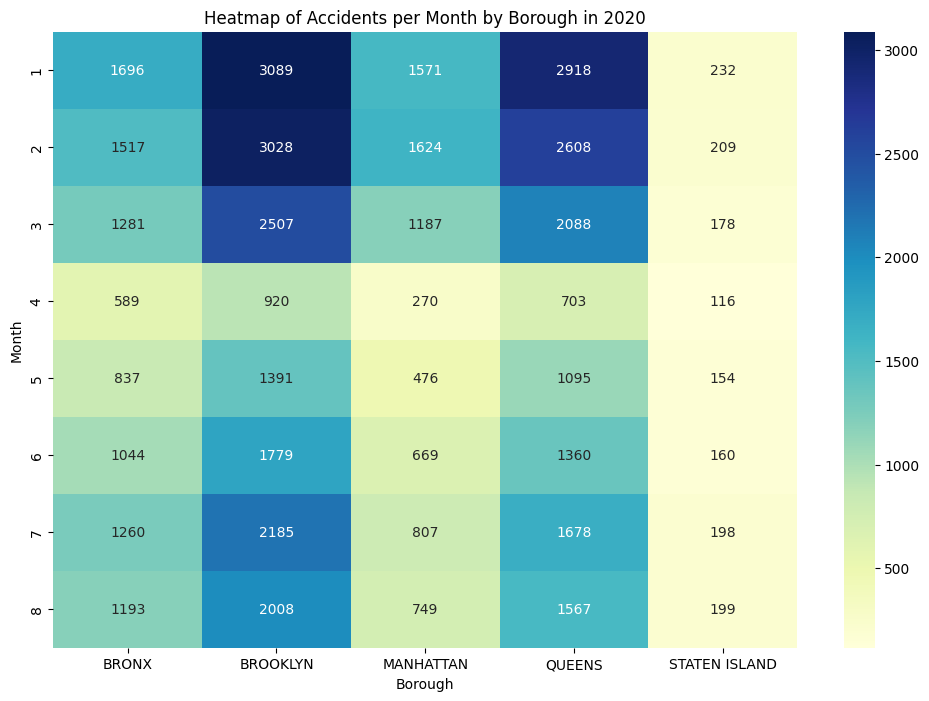

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

NYC_Accident_data = pd.read_csv('/content/drive/MyDrive/NYC Accidents 2020.csv')
NYC_Accident_data['CRASH DATE'] = pd.to_datetime(NYC_Accident_data['CRASH DATE'])
NYC_Accident_data['Month'] = NYC_Accident_data['CRASH DATE'].dt.month
borough_accidents_data = NYC_Accident_data[['Month', 'BOROUGH']].dropna()
monthly_borough_accidents = borough_accidents_data.groupby(['Month', 'BOROUGH']).size().reset_index(name='Accident Count')
pivot_data = monthly_borough_accidents.pivot(index='Month', columns='BOROUGH', values='Accident Count').fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Heatmap of Accidents per Month by Borough in 2020')
plt.xlabel('Borough')
plt.ylabel('Month')
plt.show()